1- Importion des modules

In [209]:
import numpy as np 
from sklearn.datasets import load_iris

2- Utiliser **sklearn.datasets.load_iris** pour generer un jeux de donnée valide pour la structure du réseau ci-dessus

In [210]:
data = load_iris()
x = data["data"]
y = data["target"]
# x

### I. Implementation directe de l'algorithme

3- Créer une liste des poid adaptèe au réseau

In [211]:
w  = [ np.random.rand(6,4) , np.random.rand(6,6) ,  np.random.rand(3,6) ]
b = [np.random.rand(1,6), np.random.rand(1,6) , np.random.rand(1,3) ]

4- Créer un fonction *forward()* qui Calculer les activation $a^{(l)}_{k}$

In [212]:
w

[array([[0.75, 0.25, 0.22, 0.23],
        [0.1 , 0.62, 0.64, 0.81],
        [0.04, 0.43, 0.58, 0.74],
        [0.26, 0.99, 0.74, 0.46],
        [0.3 , 0.08, 0.4 , 0.1 ],
        [0.14, 0.48, 0.95, 0.74]]),
 array([[0.74, 0.34, 0.48, 0.75, 0.18, 0.06],
        [0.68, 0.03, 0.03, 0.71, 0.79, 0.47],
        [0.72, 0.13, 0.65, 0.14, 0.58, 0.02],
        [0.5 , 0.01, 0.87, 0.01, 0.25, 0.96],
        [0.9 , 0.17, 0.56, 0.32, 0.71, 0.37],
        [0.64, 0.06, 0.44, 0.14, 0.32, 0.92]]),
 array([[0.25, 0.33, 0.04, 0.35, 0.79, 0.52],
        [0.39, 0.91, 0.8 , 0.07, 0.14, 0.79],
        [0.07, 0.84, 0.11, 0.35, 0.55, 0.72]])]

In [213]:
def seg(x):
    res =1/(1+np.exp(-x))
    if res <0.5:
        return 0
    else:
        return 1

def forward1( x , w , b, act):
    # print(x.shape)
    return  b.T + w.dot(x.T) 
    

def forword2( x , w ,b , act):
    a = []
    i = 0
    for iw in  w:
        x = forward1( x , iw , b[i], act).T
        i = i+1
        a.append(x)
    return a

a = forword2(x ,w ,b,seg)
# print(a)


5- Créer un fonction *backward()* qui Calculer les  $\delta^{(l)}_{k}$

In [214]:
def delta(a , y):
    d_L =  (a[2].T-y).T*(a[2]*(1-a[2]))
    # print((w[2].T).dot(d_L.T).shape , (a[1]*(1-a[1])).shape)
    # print((w[2].shape))
  
    d_l_1 =   (w[2].T).dot(d_L.T).T * (a[1]*(1-a[1]))
    # print((w[1].shape))
    d_l_2 =   (w[1].T).dot(d_l_1.T).T * (a[0]*(1-a[0]))
    
    omiga = [ np.array(d_l_2) , np.array(d_l_1) , np.array(d_L)  ]
    return omiga
#     print( d_l_1)
segma = delta(a ,y)   

6- Créer la fonction *fit(X,Y)* pour trouver les valeur optimales des poids

In [215]:
print(segma[1].shape)
a[0].shape

(150, 6)


(150, 6)

In [216]:
def fit1( a , segma ):
    C = []
    for i in range(2,0,-1):
        # print("segma shape :",segma[i].T.shape)
        C.append((1/segma[i].shape[0])*segma[i].T.dot(a[i-1])) 
    C.append( segma[0].T.dot( x ))
    return C

In [217]:
def fit(x, y, w ,b , act , iteration):
    for _ in range(iteration):
        a = forword2(x ,w ,b,act)
        segma = delta(a ,y)
        C = fit1( a, segma )
        C = [C[2] , C[1] , C[0] ]
        print(w)
        
        ### SHOW THE ERREUR 
        print('-------------------------min----------------------------')
        print(segma[0].min())
        print('-------------------------max----------------------------')
        print(segma[0].max())
        for i in range(len(w)):
            w[i] = C[i] 
    return w

In [218]:
C = fit(x,y,w,b,seg ,3)

[array([[0.75, 0.25, 0.22, 0.23],
       [0.1 , 0.62, 0.64, 0.81],
       [0.04, 0.43, 0.58, 0.74],
       [0.26, 0.99, 0.74, 0.46],
       [0.3 , 0.08, 0.4 , 0.1 ],
       [0.14, 0.48, 0.95, 0.74]]), array([[0.74, 0.34, 0.48, 0.75, 0.18, 0.06],
       [0.68, 0.03, 0.03, 0.71, 0.79, 0.47],
       [0.72, 0.13, 0.65, 0.14, 0.58, 0.02],
       [0.5 , 0.01, 0.87, 0.01, 0.25, 0.96],
       [0.9 , 0.17, 0.56, 0.32, 0.71, 0.37],
       [0.64, 0.06, 0.44, 0.14, 0.32, 0.92]]), array([[0.25, 0.33, 0.04, 0.35, 0.79, 0.52],
       [0.39, 0.91, 0.8 , 0.07, 0.14, 0.79],
       [0.07, 0.84, 0.11, 0.35, 0.55, 0.72]])]
-------------------------min----------------------------
-94837712092.97768
-------------------------max----------------------------
-24074024.026435856
[array([[-1.44e+13, -6.58e+12, -1.17e+13, -4.07e+12],
       [-2.22e+12, -1.01e+12, -1.82e+12, -6.41e+11],
       [-5.92e+12, -2.70e+12, -4.85e+12, -1.71e+12],
       [-1.25e+13, -5.73e+12, -1.02e+13, -3.58e+12],
       [-5.07e+12, -2.30

C:\Users\hp\AppData\Local\Temp\ipykernel_21916\3213012180.py:8: RuntimeWarning: overflow encountered in multiply
  d_l_2 =   (w[1].T).dot(d_l_1.T).T * (a[0]*(1-a[0]))


In [ ]:
def predict():
    pass

### II- Utilisation de MLPClassifier
8- Utiliser **sklearn.neural_network.MLPClassifier** pour créer, entrainer et tester le reseau ci-dessus
- MLPClassifier : multi-layer perceptron 

In [223]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

data = load_iris()
x = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1)

clf = MLPClassifier(random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

res = clf.predict_proba(X_test[:1])
print(res)

y_pred = clf.predict(X_test[: , :] )
clf.score(X_test, y_test)

[[5.84e-07 3.34e-03 9.97e-01]]


1.0

9- Calculer la matrice de confusion du resultat obtenue

<Axes: >

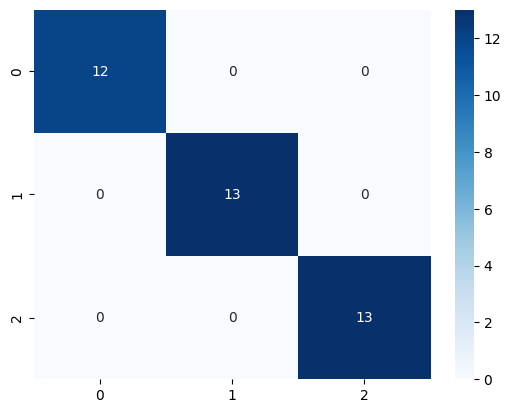

In [232]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)

### III- Utilisation Keras
ref: https://rtavenar.github.io/teaching/neuralnets_td/html/keras1.html

In [249]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model = Sequential()

# Add the first layer (input layer)
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification

In [250]:
# Compile the model
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])


# Train the model
model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=10)

Epoch 1/10
12/12 - 1s - 119ms/step - accuracy: 0.3304 - loss: -8.0716e-02
Epoch 2/10
12/12 - 0s - 14ms/step - accuracy: 0.3304 - loss: -8.1122e-01
Epoch 3/10
12/12 - 0s - 13ms/step - accuracy: 0.3304 - loss: -1.4753e+00
Epoch 4/10
12/12 - 0s - 13ms/step - accuracy: 0.3304 - loss: -2.8653e+00
Epoch 5/10
12/12 - 0s - 13ms/step - accuracy: 0.3304 - loss: -5.4825e+00
Epoch 6/10
12/12 - 0s - 15ms/step - accuracy: 0.3304 - loss: -1.2621e+01
Epoch 7/10
12/12 - 0s - 16ms/step - accuracy: 0.3304 - loss: -4.8682e+01
Epoch 8/10
12/12 - 0s - 28ms/step - accuracy: 0.3482 - loss: -8.9796e+01
Epoch 9/10
12/12 - 0s - 27ms/step - accuracy: 0.3839 - loss: 64600020.0000
Epoch 10/10
12/12 - 0s - 29ms/step - accuracy: 0.3125 - loss: 0.2910


In [251]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,435 (9.52 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [254]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Compute confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
print(confusion_matrix(y_test, y_pred_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.34      1.00      0.51        13
           2       0.00      0.00      0.00        13

    accuracy                           0.34        38
   macro avg       0.11      0.33      0.17        38
weighted avg       0.12      0.34      0.17        38

Confusion Matrix:
[[ 0 12  0]
 [ 0 13  0]
 [ 0 13  0]]


C:\Users\hp\anaconda3\envs\stageProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\envs\stageProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\envs\stageProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

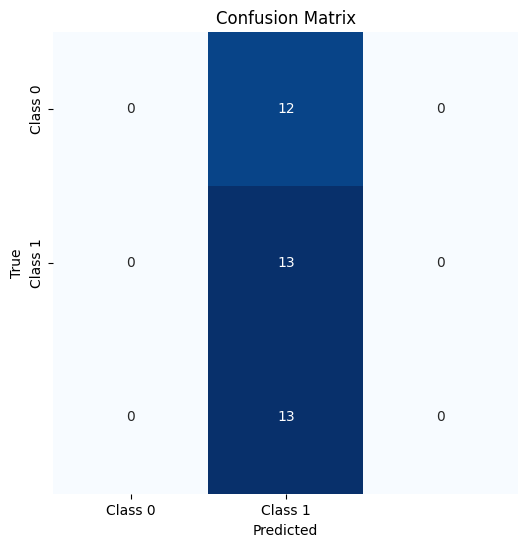

In [255]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### IV- Utilisation pytorche
ref: https://pageperso.lis-lab.fr/benoit.favre/pstaln/01_pytorch-mlp.html

In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

In [259]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        X = self.fc3(X)
        X = self.softmax(X)

        return X
    
# load IRIS dataset
dataset = pd.read_csv('dataset/iris.csv')

# transform species to numerics
dataset.loc[dataset.species=='Iris-setosa', 'species'] = 0
dataset.loc[dataset.species=='Iris-versicolor', 'species'] = 1
dataset.loc[dataset.species=='Iris-virginica', 'species'] = 2


train_X, test_X, train_y, test_y = train_test_split(dataset[dataset.columns[0:4]].values,
                                                    dataset.species.values, test_size=0.8)

# wrap up with Variable in pytorch
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())
test_y = Variable(torch.Tensor(test_y).long())


net = Net()

criterion = nn.CrossEntropyLoss()# cross entropy loss

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print ('number of epoch', epoch, 'loss', loss.data[0])
predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)

print ('prediction accuracy', accuracy_score(test_y.data, predict_y.data))

print ('macro precision', precision_score(test_y.data, predict_y.data, average='macro'))
print ('micro precision', precision_score(test_y.data, predict_y.data, average='micro'))
print ('macro recall', recall_score(test_y.data, predict_y.data, average='macro'))
print ('micro recall', recall_score(test_y.data, predict_y.data, average='micro'))

ModuleNotFoundError: No module named 'torch'